In [75]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [76]:
def f(x):
    try:
        return 2**x-1-math.cos(x/2)
    except:
        print(x)

In [77]:
def F(x):
    return np.power(2,x)-1-np.cos(x/2)

In [78]:
def f1(x):
    return np.power(2,x) * np.log(2) + 1/2 * np.sin(x/2)

In [79]:
def f2(x):
    return 2**x * math.log(2)**2 + 1/4 * math.cos(x/2)

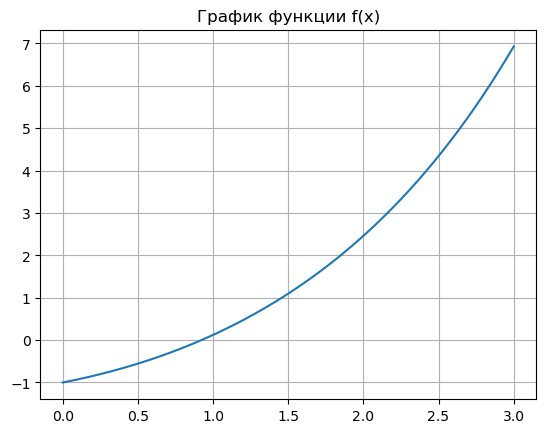

In [80]:
X = np.linspace(0,3,1000)
fif = lambda x: (np.power(2,x)-1-np.cos(x/2))
Y = fif(X)
plt.title("График функции f(x)")
sns.lineplot(x=X,y=Y)
plt.grid()
plt.show()

    Отрезок от -6 до 0

In [81]:
def binpoisk(l,r, eps=1e-8):
    k = 0
    while r-l > eps:
        k += 1
        m = (l+r)/2
        if f(m) > 0:
            r = m
        else:
            l = m
    return m, k

In [82]:
def secant(a,b,eps):
    x,x0,k = a, b, 0 
    while abs(x-x0) > eps:
        x, x0, k = x0 - f(x0) / (f(x) - f(x0)) * (x - x0), x, k+1
    return x,k

In [83]:
def hordi(a,b,eps):
    x,x0,k = a+2*eps, b, 0
    # print(f(a))
    while abs(x-x0) > eps:
        # print(x0)
        if f(a)-f(x0) == 0:
            break
        x, x0, k = x0-(a-x0)/(f(a)-f(x0))*f(x0), x, k+1
    return x,k

In [84]:
def newton(a,b,eps):
    x0,x1,k = b + 2 *eps, b, eps
    k = 0
    while abs(x1-x0) > eps:
        x1,x0,k = x1 - f(x1)/f1(x1), x1, k+1
    return x1,k

In [85]:
def fi(x):
    return f(x)+x

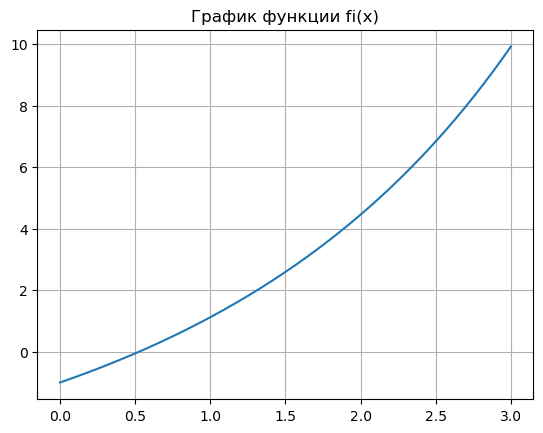

In [86]:
X = np.linspace(0,3,1000)
fif = lambda x: (np.power(2,x)-1-np.cos(x/2)) + x
Y = fif(X)
plt.title("График функции fi(x)")
sns.lineplot(x=X,y=Y)
plt.grid()
plt.show()

    от -6 до 0

In [87]:
def simplest_iter(a,eps):
    x0 = 1e18
    x = a
    k=0
    while abs(x-x0) > eps:
        x,x0,k = fi(x), x, k+1
    return x, k

In [88]:
def fii(x):
    try:
        return math.log2(1+math.cos(x/2))
    except:
        return 5e-34
def Fii(x):
    return np.log2(1+np.cos(x/2))

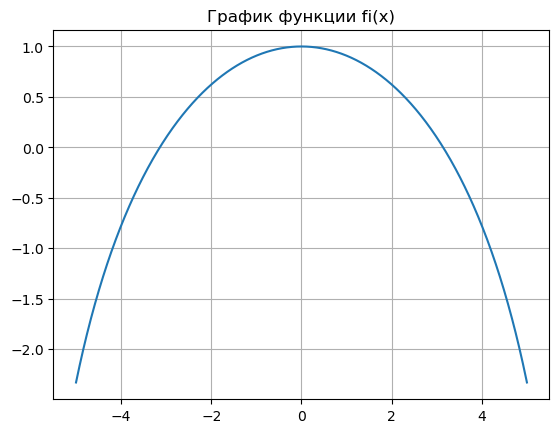

In [89]:
X = np.linspace(-5,5,1000)
Y = Fii(X)
plt.title("График функции fi(x)")
sns.lineplot(x=X,y=Y)
plt.grid()
plt.show()

In [90]:
def simple_dimple(a,eps):
    x0 = 1e18
    x = a
    k=0
    while abs(x-x0) > eps:
        x,x0,k = fii(x), x, k+1
    return x, k

    нууу.... 1 из корней нашелся

    изменим fi(x)

    |lambda| > Q/2
    Q = max|f'(x)|[a,b]

In [91]:
print(Q := min(f1(np.linspace(0,2,1000))))
print(f1(1))
print(lam := Q)

0.6931471805599453
1.626007130421992
0.6931471805599453


In [92]:
def Fi(x):
    return x - f(x) / lam

In [93]:
def FI(x):
    return x - F(x) / lam

In [94]:
def FI_(x):
    return 1 - f1(x) / lam

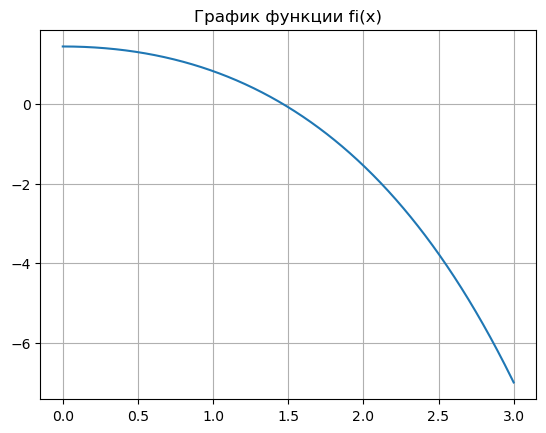

In [95]:
X = np.linspace(0,3,1000)
Y = FI(X)
plt.title("График функции fi(x)")
sns.lineplot(x=X,y=Y)
plt.grid()
plt.show()

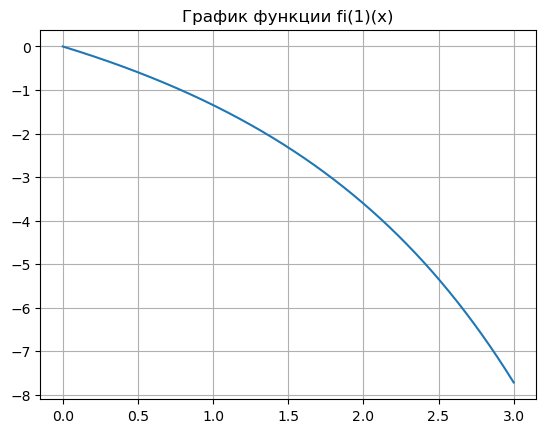

In [96]:
X = np.linspace(0,3,1000)
Y = FI_(X)
plt.title("График функции fi(1)(x)")
sns.lineplot(x=X,y=Y)
plt.grid()
plt.show()

    видим корень теперь у функции в точке ~ 0.9
    чтобы поменять корень можем поменять - на + в Fi(x)

In [97]:
def simple_iter(a,eps):
    x0 = 1e18
    x = fi(a)
    k=0
    while abs(x-x0) > eps:
        x,x0,k = Fi(x), x, k+1
    return x, k

In [98]:
eps = [1e-3,1e-5,1e-8]

funs = [simplest_iter,simple_iter,simple_dimple]

In [99]:
# print("")
for fun in funs:
    print(fun.__name__)
    for e in eps:
        x,k = fun(0,e)
        print(f"eps={e} x={x}, за k={k} итераций",)
        if abs(f(x)) > e:
            print(f"{abs(f(x))<=e}")

simplest_iter
eps=0.001 x=-5.908186442846621, за k=49 итераций
eps=1e-05 x=-5.91895742478247, за k=104 итераций
eps=1e-08 x=-5.91907258804523, за k=188 итераций
simple_iter
0.04999216093506664


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

    магия
    нашли оба корня с одной и той же точки

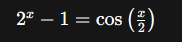

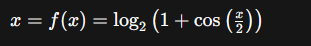